<a href="https://colab.research.google.com/github/amirsakib16/Introduction-to-Natural-Language-Processing/blob/main/22299222_Amir_Sakib_Saad_CSE440_04_Lab_Assignment03_fall2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTION 1**

# **Load the Iris dataset from sklearn.datasets.load_iris().**

In [56]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target

df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# **SHOW THE DATAFRAME**

In [57]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# **SPLIT INTO TRAIN AND TEST WITH THE RATIO OF 80% AND 20%**
## **Split the data into 80 % training and 20 % test sets.**


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.2,
    random_state=42,
    stratify=iris.target)

# **SHAPE**

In [59]:
X_train.shape

(120, 4)

In [60]:
X_test.shape

(30, 4)

# **DEFINE FEED FORWARD NEURAL NETWORK**

In [61]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**1 hidden layer**

**16 hidden units --------->  layers.Dense(16, activation='relu')
ReLU activation**

**Output layer: 3 units with softmax activation ------------> layers.Dense(3, activation='softmax')**

**Optimizer: Adam ------------------------> model.compile(optimizer='adam', ......)**

**Loss: Categorical cross-entropy ------------------> loss='categorical_crossentropy'**

**Epochs: 200**


In [62]:
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

history = model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.4835 - loss: 0.8888 - val_accuracy: 0.3333 - val_loss: 0.9491
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4817 - loss: 0.8637 - val_accuracy: 0.4167 - val_loss: 0.9171
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5649 - loss: 0.7730 - val_accuracy: 0.4167 - val_loss: 0.8870
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5263 - loss: 0.8162 - val_accuracy: 0.4583 - val_loss: 0.8583
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4902 - loss: 0.8047 - val_accuracy: 0.6250 - val_loss: 0.8307
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7359 - loss: 0.7329 - val_accuracy: 0.6667 - val_loss: 0.8064
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8129 - loss: 0.7278 - val_accuracy: 0.6667 - val_loss: 0.7822
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8213 - loss: 0.7058 - val_accuracy: 0.6667 - val_loss

# **SUMMARY OF THE OUTPUT**


In [63]:
print("TEST SET EVALUATION")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nSample predictions (first 10):")
print("Predicted:", y_pred_classes[:10])
print("Actual:   ", y_test[:10])

print("TRAINING AND VALIDATION CURVES")

TEST SET EVALUATION
Test Loss:     0.1317
Test Accuracy: 0.9667 (96.67%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

Sample predictions (first 10):
Predicted: [0 2 1 1 0 1 0 0 2 1]
Actual:    [0 2 1 1 0 1 0 0 2 1]
TRAINING AND VALIDATION CURVES


# **GRAPH PLOT**

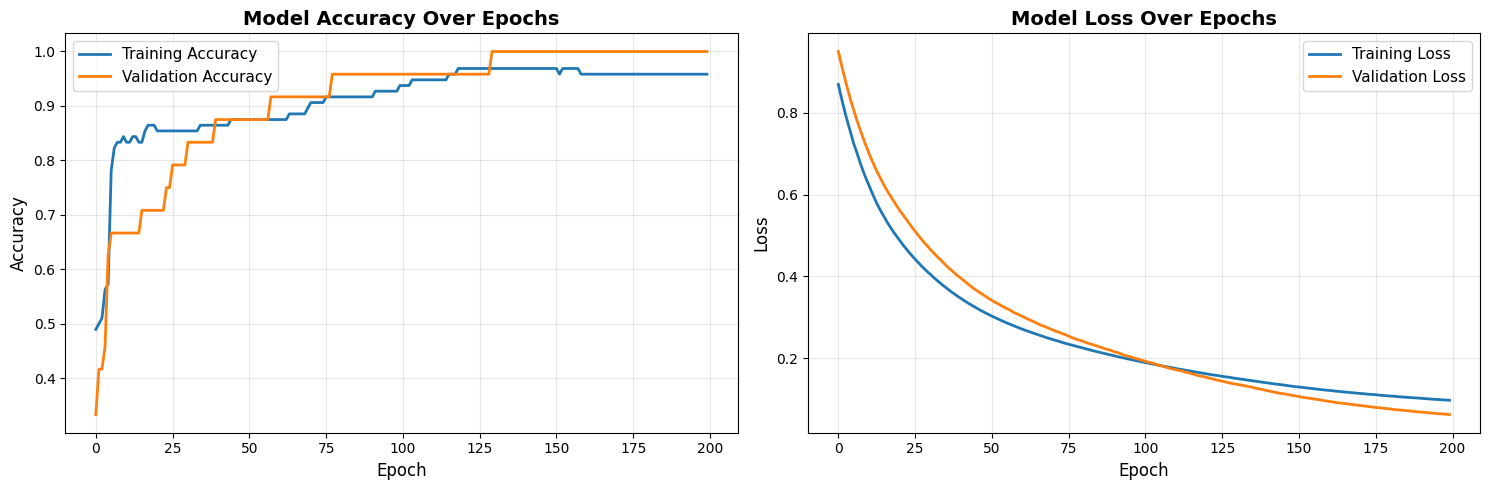

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **QUESTION 2**

# **Use keras.datasets.imdb to load the IMDb movie‑review dataset.Limit the vocabulary to the top 10,000 most frequent words.**


In [65]:
from tensorflow.keras.datasets import imdb
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [66]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# **Take the original training set and split it further into 80 % training and 20 % validation.**


In [67]:
x_train = pad_sequences(x_train, maxlen=500)
x_test = pad_sequences(x_test, maxlen=500)
num_train = int(0.8 * len(x_train))
x_train_part = x_train[:num_train]
y_train_part = y_train[:num_train]
x_val = x_train[num_train:]
y_val = y_train[num_train:]

Define a neural network with:

Use an embedding layer (10,000 input dim, 64 output dim), then a dense layer with 32 ReLU units, and a sigmoid output layer with 1 unit.

Loss: Binary cross‑entropy.

Optimizer: Adam.

Epochs: 10–15


In [68]:
model = Sequential([Embedding(input_dim=10000, output_dim=64), Flatten(), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# **10 Epochs causes overfitting, should use early stop or dropout**

In [69]:
history = model.fit(x_train_part, y_train_part, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5451 - loss: 0.6887 - val_accuracy: 0.7998 - val_loss: 0.4560
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8672 - loss: 0.3479 - val_accuracy: 0.8670 - val_loss: 0.3129
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9322 - loss: 0.1879 - val_accuracy: 0.8720 - val_loss: 0.3060
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9818 - loss: 0.0867 - val_accuracy: 0.8660 - val_loss: 0.3334
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9946 - loss: 0.0439 - val_accuracy: 0.8750 - val_loss: 0.3297
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9986 - loss: 0.0204 - val_accuracy: 0.8698 - val_loss: 0.3539
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9996 - loss: 0.0108 - val_accuracy: 0.8660 - val_loss: 0.3807
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9998 - loss: 0.0064 - val_accuracy: 0.8654 - v

In [70]:
from tensorflow.keras.layers import Dropout
model = Sequential([Embedding(input_dim=10000, output_dim=64), Flatten(), Dense(32, activation='relu'), Dense(1, activation='sigmoid'), Dropout(0.5)])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit(x_train_part, y_train_part, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5006 - loss: 4.8187 - val_accuracy: 0.5062 - val_loss: 0.7997
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5592 - loss: 4.2592 - val_accuracy: 0.5062 - val_loss: 0.7950
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6144 - loss: 4.3482 - val_accuracy: 0.5138 - val_loss: 0.6718
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6434 - loss: 4.2800 - val_accuracy: 0.5114 - val_loss: 0.7125
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6689 - loss: 4.3480 - val_accuracy: 0.6714 - val_loss: 0.5445
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6905 - loss: 4.2248 - val_accuracy: 0.7494 - val_loss: 0.4800
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6928 - loss: 4.2061 - val_accuracy: 0.5196 - val_loss: 0.7660
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6665 - loss: 4.2910 - val_accuracy: 0.6312 - v

# **Report the test accuracy**

In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.2f}")


Test Accuracy: 0.71


# **Accuracy and Loss Graph**

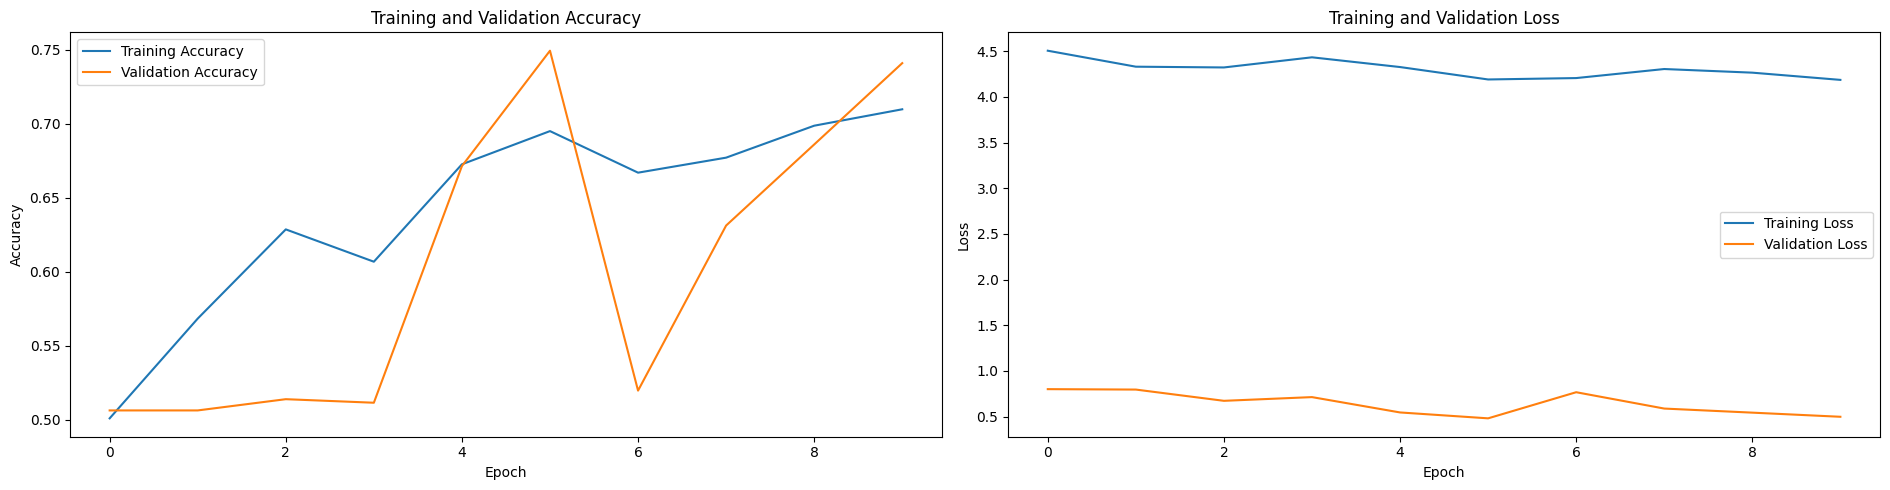

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **AUC AND ROC GRAPH PLOT**

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


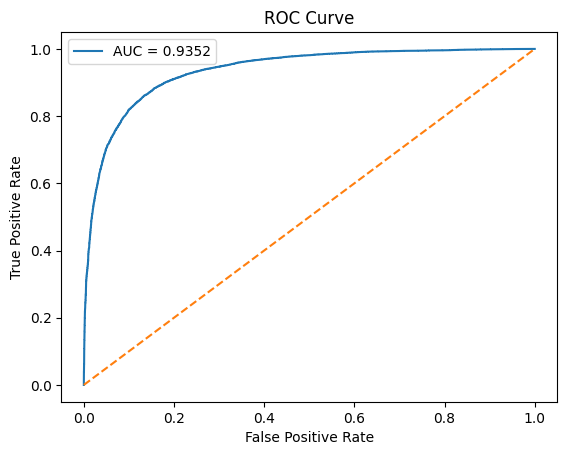

AUC Score: 0.9352


In [74]:
y_pred_prob = model.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print(f"AUC Score: {roc_auc:.4f}")

# **QUESTION 3**

# **DNN ARCHITECTURE**

In [75]:
deep_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=500),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
deep_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## **MODEL TRAIN**

In [76]:
history_deep = deep_model.fit(x_train_part,y_train_part,epochs=15,batch_size=512,validation_data=(x_val, y_val),verbose=1)

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.5086 - loss: 0.6932 - val_accuracy: 0.5704 - val_loss: 0.6574
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6631 - loss: 0.6047 - val_accuracy: 0.7876 - val_loss: 0.4529
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8797 - loss: 0.3056 - val_accuracy: 0.8678 - val_loss: 0.3343
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9511 - loss: 0.1473 - val_accuracy: 0.8494 - val_loss: 0.3807
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9763 - loss: 0.0900 - val_accuracy: 0.8656 - val_loss: 0.4325
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9942 - loss: 0.0251 - val_accuracy: 0.8606 - val_loss: 0.5250
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9974 - loss: 0.0115 - val_accuracy: 0.8538 - val_loss: 0.5864
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9968 - loss: 0.0117 - val_accuracy: 0.8588 - v

# **DNN TEST ACCURACY**

In [77]:
test_loss_deep, test_acc_deep = deep_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc_deep:.2f}")

Test Accuracy: 0.86


## **SHALLOW NN TEST ACCURACY**

In [78]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.71


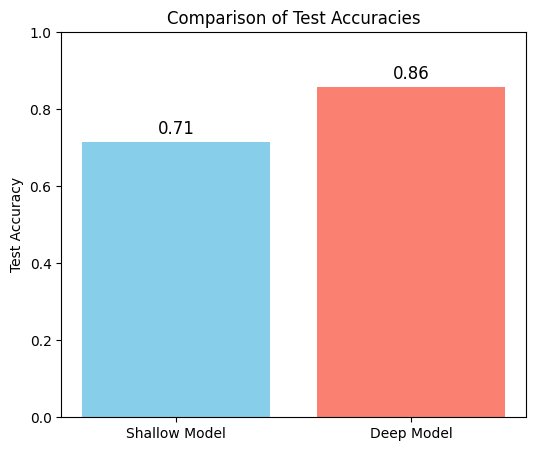

In [79]:
models = ['Shallow Model', 'Deep Model']
accuracies = [test_acc, test_acc_deep]

plt.figure(figsize=(6, 5))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()

# **DNN Loss and Accuracy Graph**

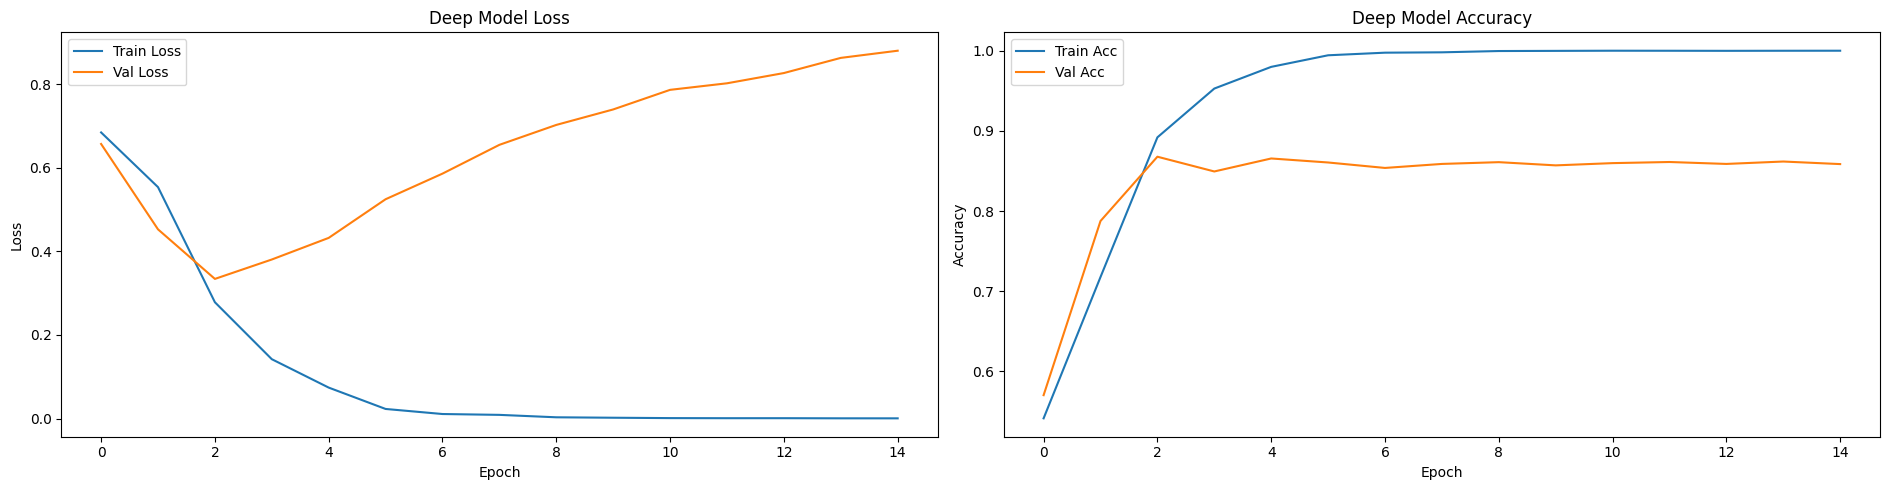

In [80]:
plt.figure(figsize=(19, 5))
plt.subplot(1, 2, 1)
plt.plot(history_deep.history['loss'], label='Train Loss')
plt.plot(history_deep.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_deep.history['accuracy'], label='Train Acc')
plt.plot(history_deep.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Deep Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **SNN Loss and Accuracy Graph**

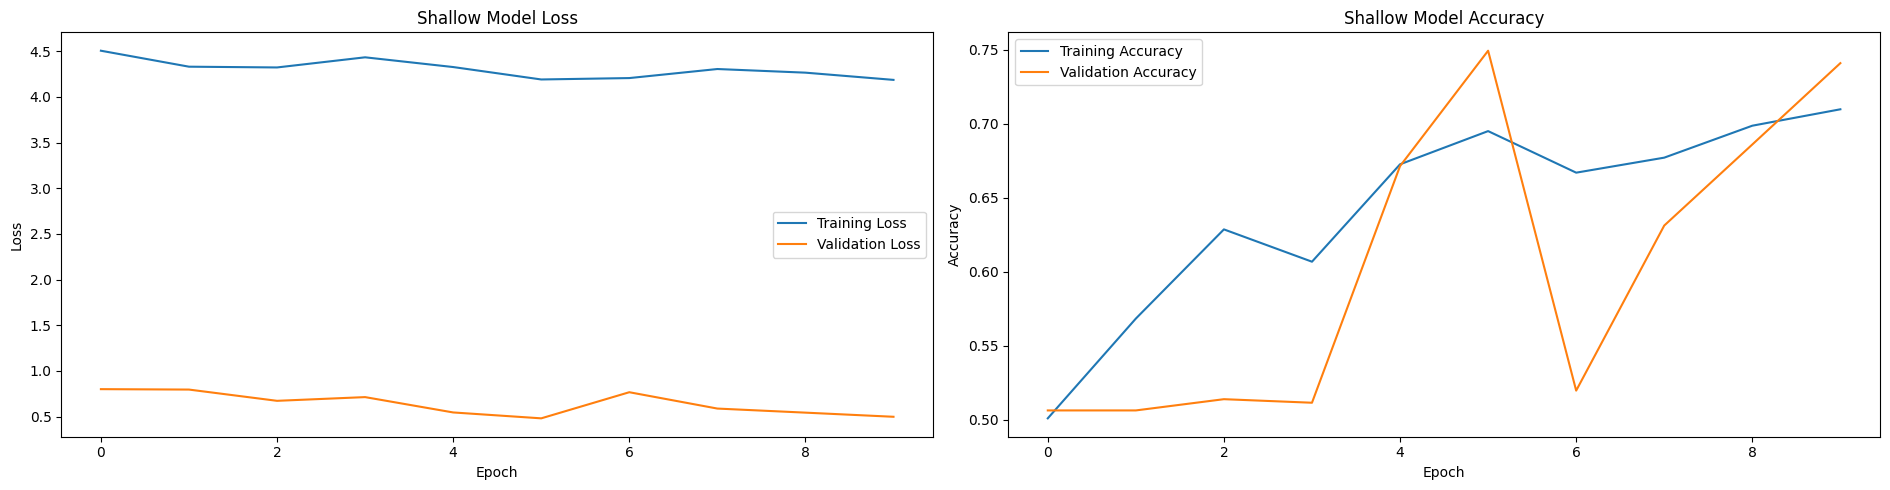

In [81]:
plt.figure(figsize=(19, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Shallow Model Accuracy')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Shallow Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **CONFUSION MATRIX COMPARISON**

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


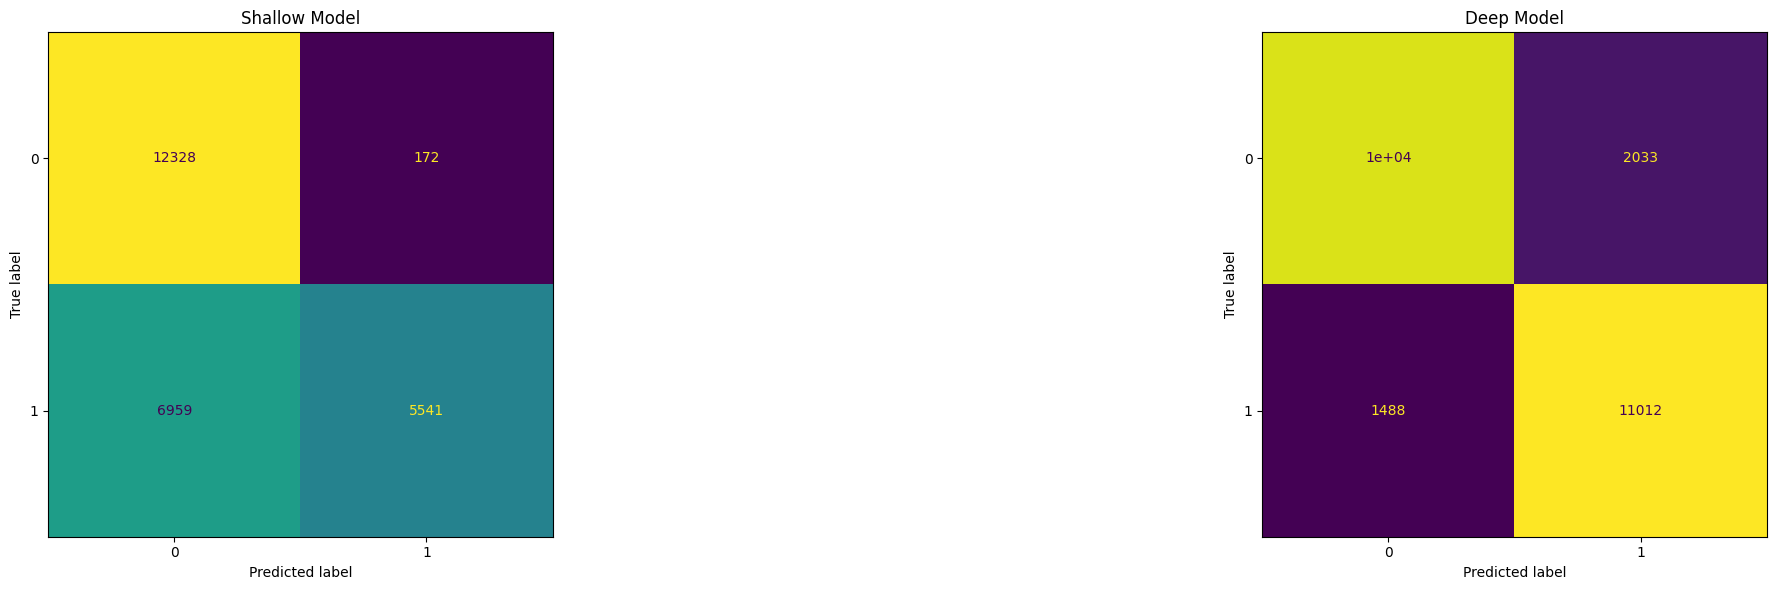

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_shallow = (model.predict(x_test) > 0.5).astype(int)
y_pred_deep = (deep_model.predict(x_test) > 0.5).astype(int)
cm_shallow = confusion_matrix(y_test, y_pred_shallow)
cm_deep = confusion_matrix(y_test, y_pred_deep)
fig, axes = plt.subplots(1, 2, figsize=(30, 6))

disp1 = ConfusionMatrixDisplay(cm_shallow, display_labels=[0, 1])
disp1.plot(ax=axes[0], colorbar=False)
axes[0].set_title('Shallow Model')

disp2 = ConfusionMatrixDisplay(cm_deep, display_labels=[0, 1])
disp2.plot(ax=axes[1], colorbar=False)
axes[1].set_title('Deep Model')

plt.tight_layout()
plt.show()

# **SUMMARY**

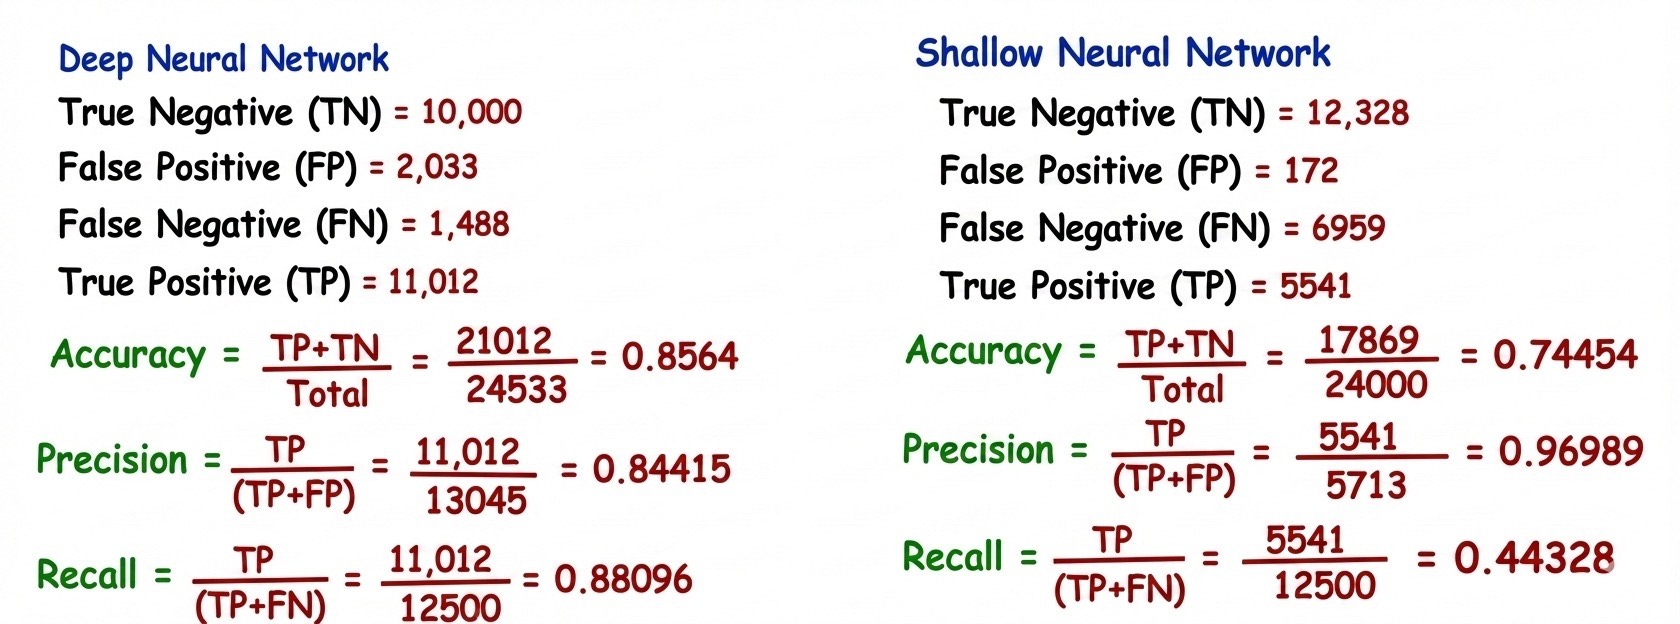

# **CONCLUSION: DEEP NEURAL NETWORK PERFORMS BETTER THAN THAT OF SHALLOW NEURAL NETWORK**